<a href="https://colab.research.google.com/github/liliya2022/Ames-Housing-Machine-Learning/blob/main/ML_Project_Ames_Housing_Neighborhood_Analysis_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project - Ames Housing Neighborhood Analysis - Part 2**

*By Liliya Lopez*

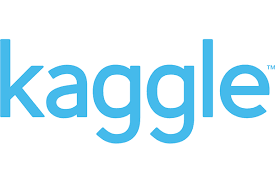

## **1.Introduction**

#####**Libraries used**

In [284]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import warnings
import statsmodels as sm
import statsmodels.api as sm



#####**Import dataset**

In [285]:
from google.colab import drive

In [286]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
housing = pd.read_csv('drive/MyDrive/Colab Notebooks/Ames_HousePrice.csv', index_col=0)
pd.set_option('display.max_columns', 20)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [288]:
housing.shape

(2580, 81)

In [289]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [290]:
housing_2 = pd.read_csv('drive/MyDrive/Colab Notebooks/Ames_Real_Estate_Data.csv', index_col=0)
pd.set_option('display.max_columns', 20)
housing_2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [291]:
housing_2.shape

(22213, 90)

In [292]:
housing_2.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

## **2.Neighborhood Analysis**

##### **Does the price sensitivity on quality depend on the neighborhood?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

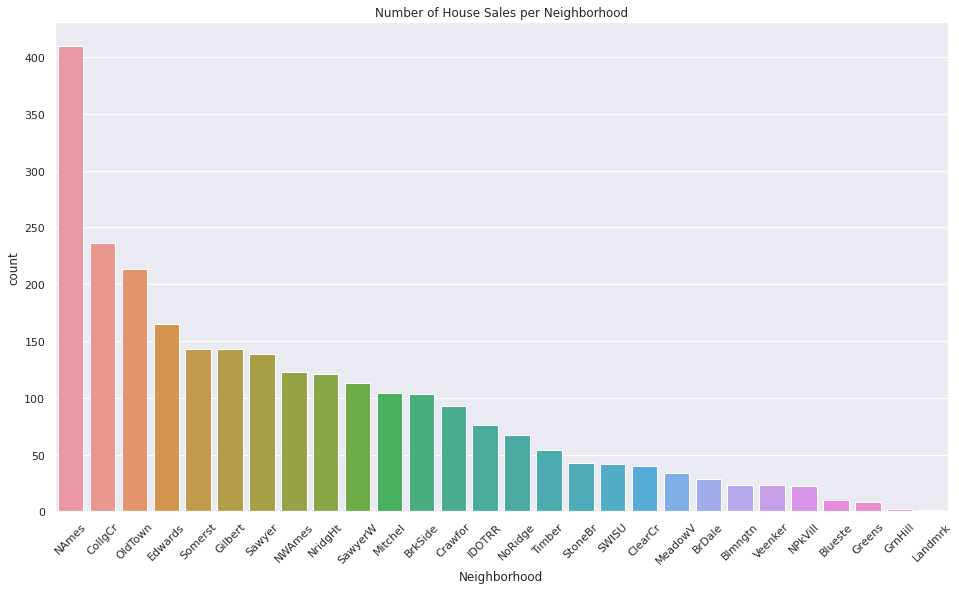

In [293]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.countplot(x ='Neighborhood', data = housing, order = housing['Neighborhood'].value_counts().index).set(title = "Number of House Sales per Neighborhood")
plt.xticks(rotation=45)

[Text(0.5, 1.0, 'Neighborhood Boxplot')]

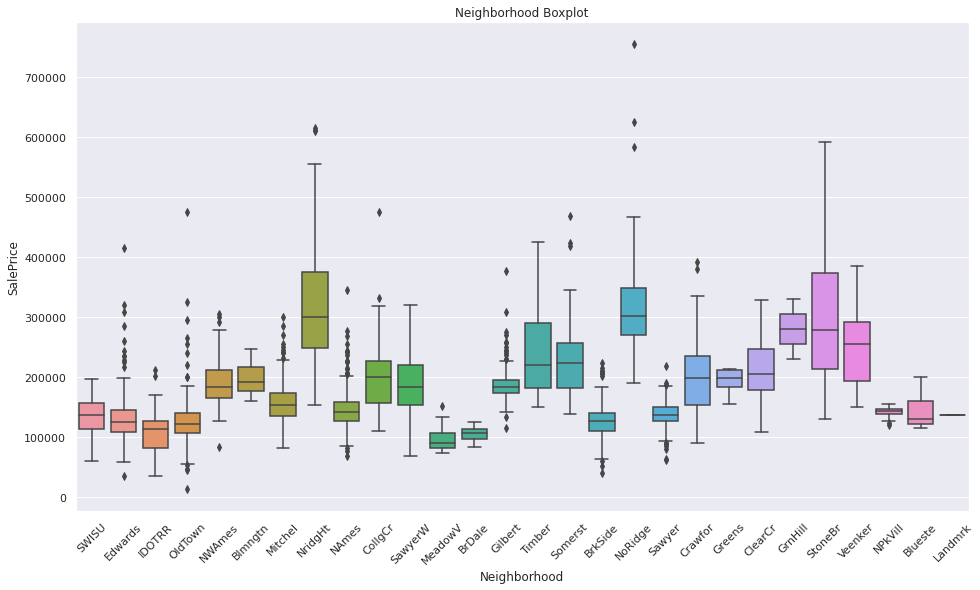

In [294]:
sns.set(rc = {'figure.figsize':(16,9)})
plt.xticks(rotation=45)
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing).set(title = "Neighborhood Boxplot")

##### **Given that Ames has about 30% poverty rate, and that ISU is the largest employer of the city, identify the affluent and poor neighborhoods based on your data analysis and the external information. Identify the neighborhoods which offer a convenient job commute.**

In [295]:
pivot = pd.pivot_table(
    data=housing,
    index='Neighborhood',
    aggfunc={'SalePrice': 'mean'}
)


In [296]:
pivot_sorted = pivot.sort_values(by=['SalePrice'], ascending=False)
round(pivot_sorted)

,SalePrice
Neighborhood,
NoRidge,326114.0
NridgHt,313662.0
StoneBr,305308.0
GrnHill,280000.0
Veenker,251263.0
Timber,242910.0
Somerst,228762.0
ClearCr,213981.0
Crawfor,201989.0


In [297]:
neighborhoods = housing["Neighborhood"]
neighborhoods.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [298]:
expanded = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'Greens' : 'Greens',
    'GrnHill': 'Green Hills',
    'IDOTRR': 'Iowa Department of Transportation',
    'Landmrk': 'Landmark',
    'MeadowV': 'Meadow',
    'Mitchel': 'Mitchel',
    'NAmes': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'North Park',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brooke',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}

In [299]:
neighborhoods.replace(expanded, inplace=True)

In [300]:
import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Iowa State University, Ames, USA")
location

Location(Iowa State University, Peggy's Trail, Ames, Story County, Iowa, 50011, United States, (42.02790455, -93.64461297801853, 0.0))

In [301]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [302]:
locations = [(geocode(addr + ', Ames, USA'), addr) for addr in neighborhoods.unique()]

In [303]:
locations = []
for addr in neighborhoods.unique():
  location = (geocode(addr + ', Ames, USA'), addr) 
  locations.append(location)
  print(location)

(Location(Iowa State University, Peggy's Trail, Ames, Story County, Iowa, 50011, United States, (42.02790455, -93.64461297801853, 0.0)), 'Iowa State University')
(Location(Edwards Elementry School, 820, Miller Avenue, Longview, Ames, Story County, Iowa, 50014, United States, (42.01590145, -93.68558625319007, 0.0)), 'Edwards')
(Location(Iowa Department of Transportation, Ames, Story County, Iowa, United States, (42.0207322, -93.62208142383324, 0.0)), 'Iowa Department of Transportation')
(Location(Historic Old Town, Ames, Story County, Iowa, 50010, United States, (42.029516799999996, -93.61378147201995, 0.0)), 'Old Town')
(Location(Northwest Bank, 100, South 16th Street, Ames, Story County, Iowa, 50010, United States, (42.007919900000005, -93.61109774520256, 0.0)), 'Northwest Ames')
(Location(Bloomington Heights, Ames, Story County, Iowa, United States, (42.0600876, -93.63919638156165, 0.0)), 'Bloomington Heights')
(None, 'Mitchel')
(Location(Northridge Heights, Ames, Story County, Iowa,

In [304]:
pip install utm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [305]:
import utm

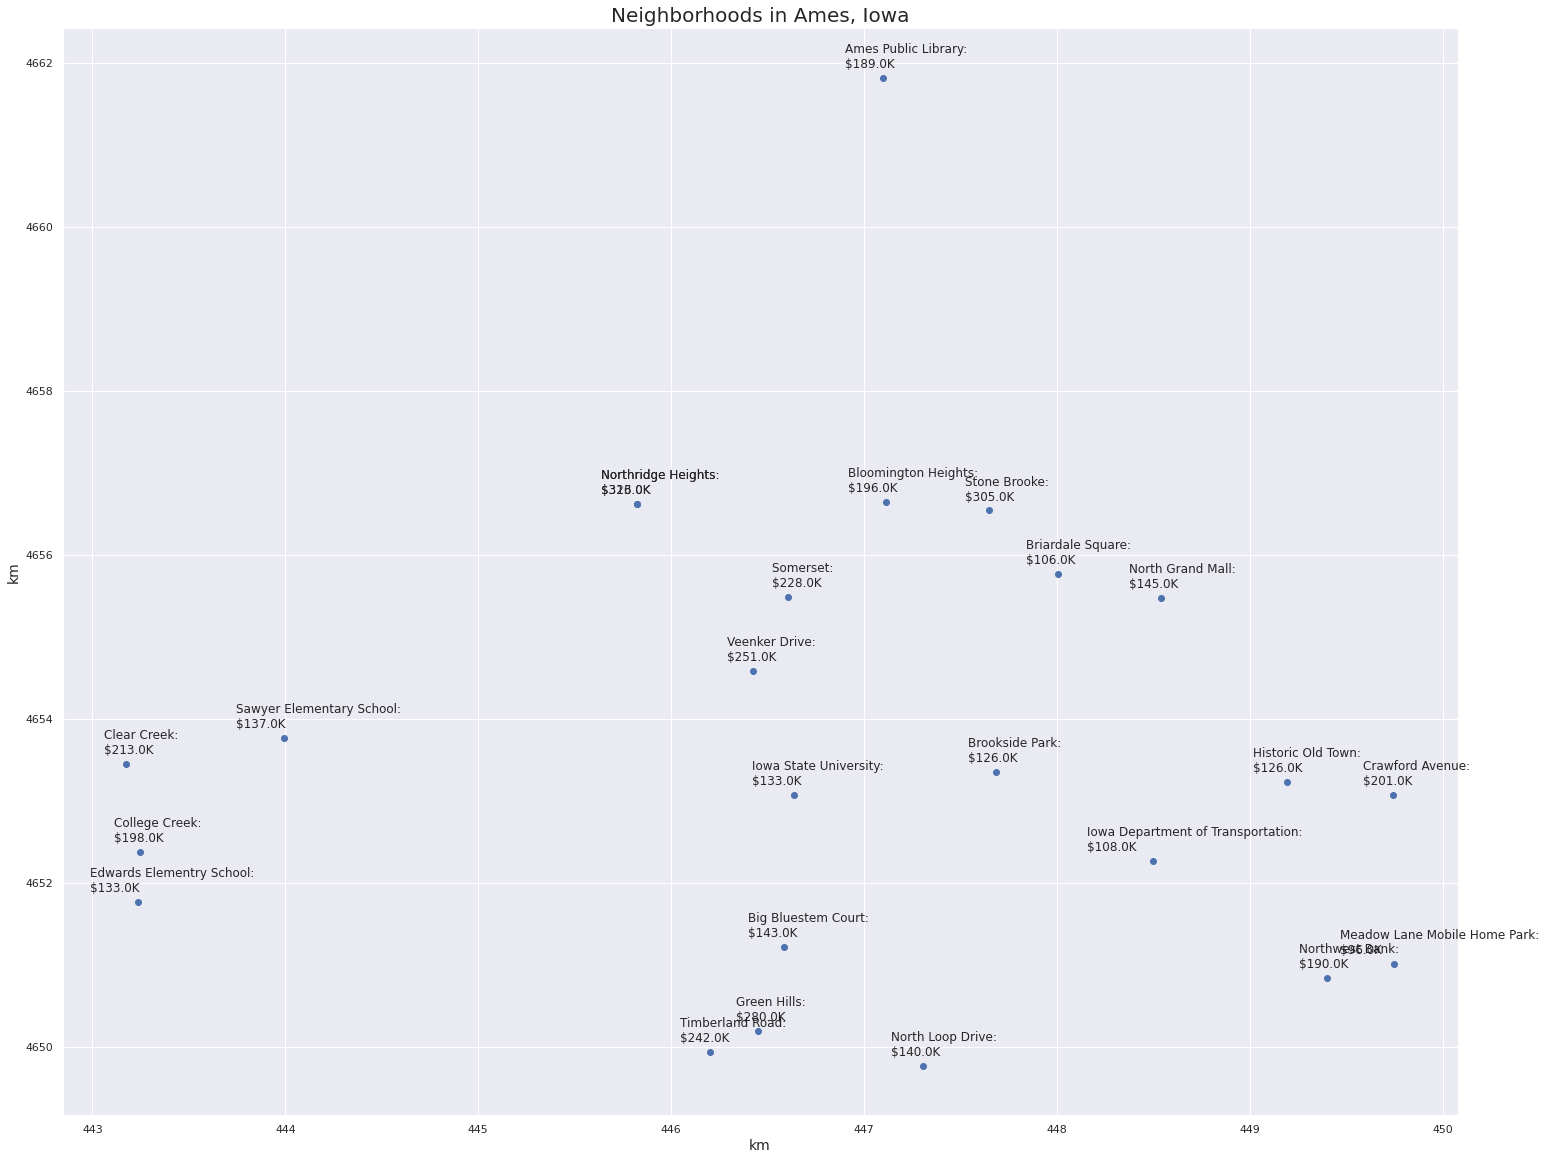

In [306]:
plt.figure(figsize=(25, 20))

house_prices = housing["SalePrice"]

xs = []
ys = []
labels = []

for location, addr in locations:
  if location is None:
    continue
  x, y = utm.from_latlon(location.latitude, location.longitude)[:2]
  xs.append(x / 1000)
  ys.append(y / 1000)
  filter_addr = neighborhoods == addr
  price = f": \n${house_prices[filter_addr].mean() // 1000}K"
  labels.append(location.address.split(",")[0] + price)

plt.scatter(xs, ys)

for label, x, y in zip(labels, xs, ys):
  plt.annotate(label, (x, y), xytext=(-len(label) * 2 + 20, 10), textcoords='offset points')

plt.xlabel("km", fontsize=14)
plt.ylabel("km", fontsize=14)
plt.title("Neighborhoods in Ames, Iowa", fontsize=20)
plt.show()


##### **What types of dwelling are popular in Ames? How about their popularities in the different neighborhoods?**

[Text(0.5, 1.0, 'Building Type Per Neighboorhood')]

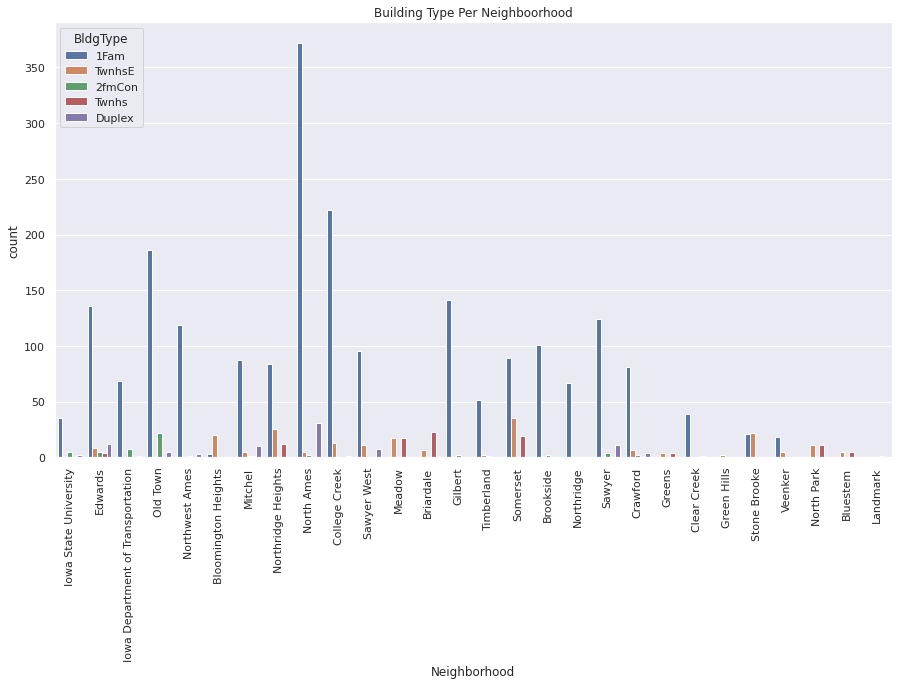

In [307]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(rotation=90)
sns.countplot(x="Neighborhood", hue="BldgType", data=housing).set(title = "Building Type Per Neighboorhood")

## **3.Time Series Analysis**

##### **During 2006−2010, does Ames housing market show any pricing trend? Is your observation consistent with the fact that the great recession occured in 2008−2009.**

In [308]:
housing_time_ser = housing[['SalePrice', 'MoSold', 'YrSold', 'BldgType']]

In [309]:
cols = ['MoSold', 'YrSold']
housing_time_ser['DateSold'] = housing_time_ser[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
housing_time_ser['DateSold'] = pd.to_datetime(housing_time_ser['DateSold'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [310]:
housing_time_ser_2 = housing_time_ser.drop(['MoSold', 'YrSold'], axis = 1)

In [311]:
print(housing_time_ser_2.DateSold.min())
print(housing_time_ser_2.DateSold.max())

2006-01-01 00:00:00
2010-07-01 00:00:00


In [312]:
housing_time_ser_2 = housing_time_ser_2.set_index('DateSold')

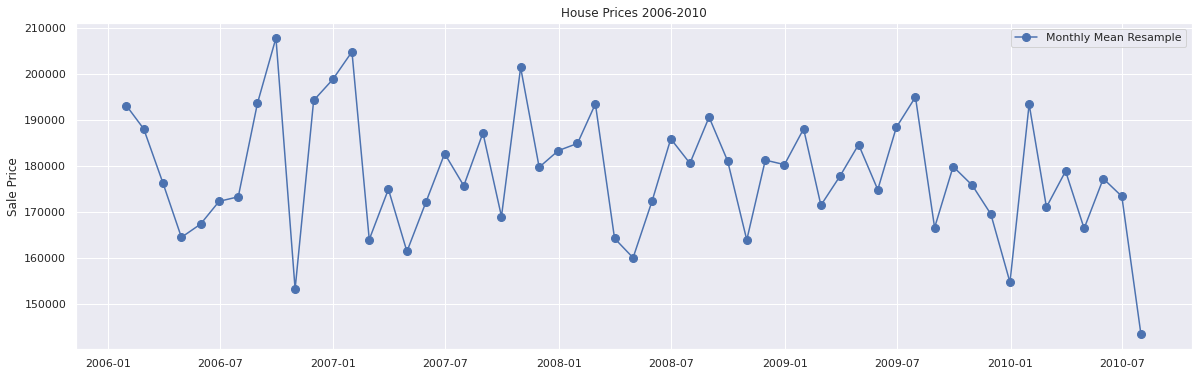

In [313]:
y = housing_time_ser_2['SalePrice']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Sale Price')
plt.title('House Prices 2006-2010')
ax.legend()

##### **How would you describe the price tend of different types of dwellings in terms of time series (hint: pivot/pivot_table)?**

In [314]:
housing_time_ser_3 = housing_time_ser.drop(['MoSold', 'YrSold'], axis = 1)

In [315]:
housing_time_ser_3 = housing_time_ser_3.set_index('DateSold')

In [316]:
pivot = pd.pivot_table(
    data=housing_time_ser_3 ,
    index='DateSold',
    columns='BldgType',
    values='SalePrice'
)


In [317]:
pivot = pivot.fillna(pivot.mean())

In [318]:
pivot.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01'],
              dtype

Text(0, 0.5, 'House Price per Building Type')

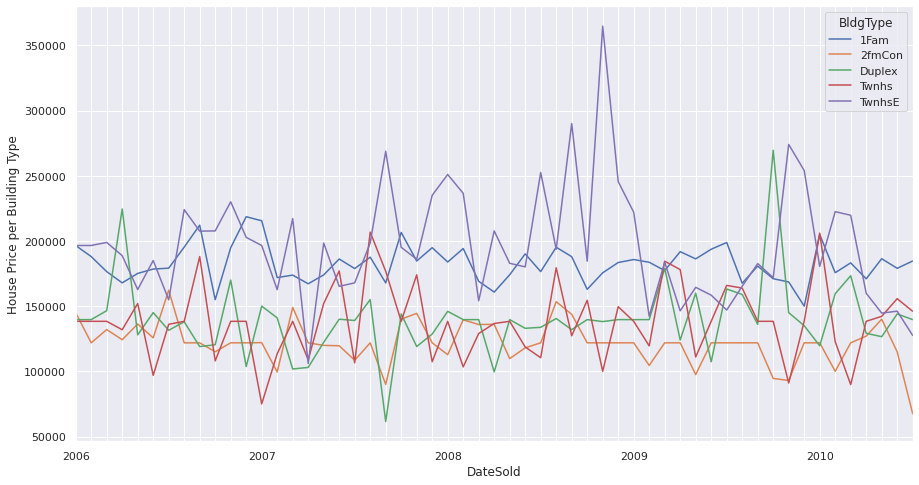

In [319]:
pivot.plot(xticks=pivot.index)
plt.ylabel('House Price per Building Type')

##### **In the U.S., there are more house-shopping activities during the warmer seasons (spring/summer). What is the seasonality of Ames house transactions?**

In [320]:
# graphs to show seasonal_decompose

def seasonal_decompose (y):
  y = y.resample('M').mean()
  decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
  fig = decomposition.plot()
  fig.set_size_inches(16,8)
  plt.show()

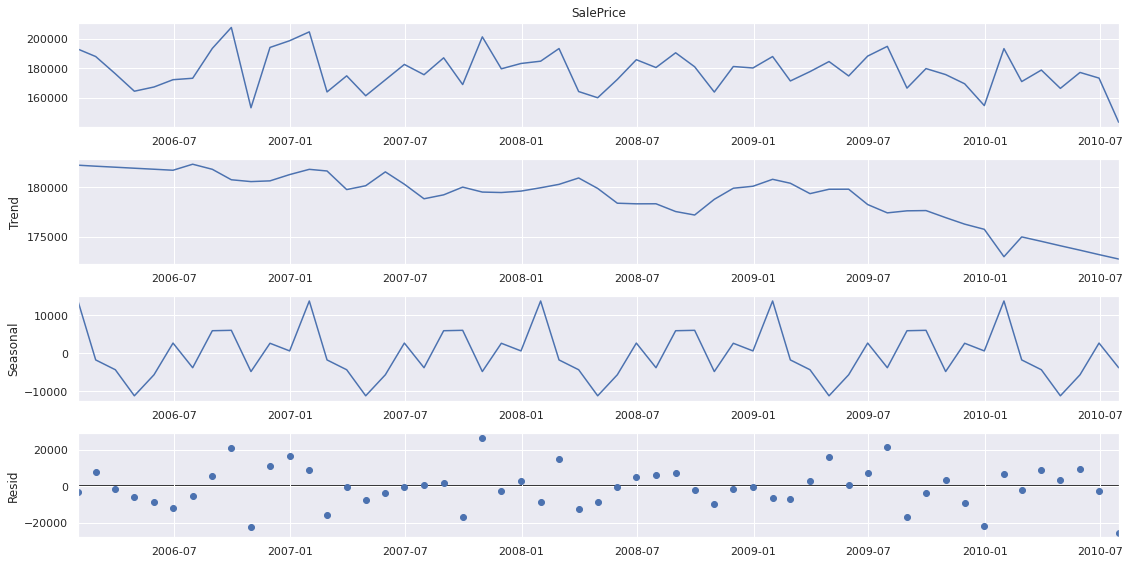

In [321]:
seasonal_decompose(y)

In [322]:
#https://www.zillow.com/ames-ia/home-values/